# NLP - Session 13 - Text Summarization 

#### What is text summarization?
Text summarization is the process of creating a short, accurate, and fluent summary of a longer text document. It is the process of distilling the most important information from a source text. Automatic text summarization is a common problem in machine learning and natural language processing (NLP). Automatic text summarization methods are greatly needed to address the ever-growing amount of text data available online to both better help discover relevant information and to consume relevant information faster.

#### Why automatic text summarization?
 - Summaries reduce reading time.
 - While researching using various documents, summaries make the selection process easier.
 - Automatic summarization improves the effectiveness of indexing.
 - Automatic summarization algorithms are less biased than human summarizers.
 - Personalized summaries are useful in question-answering systems as they provide personalized information.
 - Using automatic or semi-automatic summarization systems enables commercial abstract services to – increase the number of text documents they are able to process.
 
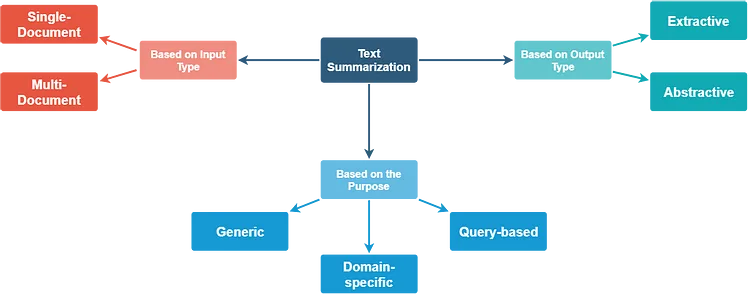

 - An Extractive summarization method consists of selecting important sentences, paragraphs etc. from the original document and concatenating them into shorter form.
 - An Abstractive summarization is an understanding of the main concepts in a document and then express those concepts in clear natural language.
 - The Domain-specific summarization techniques utilize the available knowledge specific to the domain of text. For example, automatic summarization research on medical text generally attempts to utilize the various sources of codified medical knowledge and ontologies.
 - The Generic summarization focuses on obtaining a generic summary or abstract of the collection of documents, or sets of images, or videos, news stories etc.
 - TheQuery-based summarization, sometimes called query-relevant summarization, summarizes objects specific to a query.
 - The Multi-document summarization is an automatic procedure aimed at extraction of information from multiple texts written about the same topic. Resulting summary report allows individual users, such as professional information consumers, to quickly familiarize themselves with information contained in a large cluster of documents.
 - The Single-document summarization generates a summary from a single source document.
 
#### How to do text summarization
 - Text cleaning
 - Sentence Tokenization
 - Word tokenization
 - Word-frequency table
 - Summarization

#### Text
This is the piece of text which we will be using in this project. We will perform extractive summarization of this text.

`text = """
There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.
An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is summarizing news articles. Imagine a system, which automatically pulls together news articles on a given topic (from the web), and concisely represents the latest news as a summary.
Image collection summarization is another application example of automatic summarization. It consists in selecting a representative set of images from a larger set of images.[3] A summary in this context is useful to show the most representative images of results in an image collection exploration system. Video summarization is a related domain, where the system automatically creates a trailer of a long video. This also has applications in consumer or personal videos, where one might want to skip the boring or repetitive actions. Similarly, in surveillance videos, one would want to extract important and suspicious activity, while ignoring all the boring and redundant frames captured.
"""`

We will import all the necessary libraries.

 - `spacy` for Natural Language Processing.
 - `STOP_WORDS` is a set of default stop words for English language model in SpaCy.
 - `punctuation` is a pre-initialized string which will give the all sets of punctuation.

In [ ]:
from string import punctuation

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

Here we will create a list of `stopwords`.

In [ ]:
stopwords = list(STOP_WORDS)
stopwords

`spacy.load` is used to load a model. `spacy.load('en_core_web_sm')` loads the model package `en_core_web_sm`. This will return a language object `nlp` containing all components and data needed to process text.

In [ ]:
nlp = spacy.load("en_core_web_sm")

Calling the `nlp` object on a string of text will return a processed `Doc`. During processing, `spaCy` first `tokenizes` the text, i.e. segments it into words, punctuation and so on.

In [ ]:
text = """
There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.
An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is summarizing news articles. Imagine a system, which automatically pulls together news articles on a given topic (from the web), and concisely represents the latest news as a summary.
Image collection summarization is another application example of automatic summarization. It consists in selecting a representative set of images from a larger set of images.[3] A summary in this context is useful to show the most representative images of results in an image collection exploration system. Video summarization is a related domain, where the system automatically creates a trailer of a long video. This also has applications in consumer or personal videos, where one might want to skip the boring or repetitive actions. Similarly, in surveillance videos, one would want to extract important and suspicious activity, while ignoring all the boring and redundant frames captured.
"""

In [ ]:
doc = nlp(text)

Each `Doc` consists of individual `tokens`, and we can iterate over them. Now we will make a list of tokens called tokens.

In [ ]:
tokens = [token.text for token in doc]
print(tokens)

We can see that all the `punctuation` marks and special characters are included in the tokens. Now we will remove them. `punctuation` contains a string of all the punctuations but it does now conatin `\n`. So we will add `\n` in `punctuation`.

In [ ]:
punctuation = punctuation + "\n"
punctuation

Now we will make the `word frequency table`. It will contain the number of occurrences of all the distinct words in the text which are not `punctuations` or `stop words`. We will create a dictionary named `word_frequencies`.

In [ ]:
word_frequencies = {}
for word in doc:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1

print(word_frequencies)

Now we will get the `max_frequency`.

In [ ]:
max_frequency = max(word_frequencies.values())
max_frequency

We will divide each frequency value in `word_frequencies` with the `max_frequency` to `normalize the frequencies`.

In [ ]:
for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word] / max_frequency

print(word_frequencies)

Now we will do `sentence tokenization`. The entire text is divided into sentences.

In [ ]:
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

Now we will calculate the sentence scores. The sentence score for a particular sentence is the sum of the normalized frequencies of the words in that sentence. All the sentences will be stored with their score in the dictionary `sentence_scores`.

In [ ]:
sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]

sentence_scores

Now we are going to select 30% of the sentences having the largest scores. For this we are going to import `nlargest` from `heapq`.

In [ ]:
from heapq import nlargest

We want the length of summary to be 30% of the original length which is 4. Hence the summary will have 4 sentences.

In [ ]:
select_length = int(len(sentence_tokens) * 0.3)
select_length

`nlargest()` will return a list with the select_length largest elements i.e. 4 largest elements from `sentence_scores`. `key = sentence_scores.get` specifies a function of one argument that is used to extract a comparison key from each element in `sentence_scores`.

In [ ]:
summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)
summary

Now we will combine this sentence together and make final string which contains the summary.

In [ ]:
final_summary = [word.text for word in summary]
summary = " ".join(final_summary)

Now we will display the original text, the summary of the text and the lengths of the original text and the generated summary.

In [ ]:
print(text)

In [ ]:
print(summary)

In [ ]:
len(text)

In [ ]:
len(summary)

As you the length of the text is reduced from 1869 to 605 after summarization.